<a href="https://colab.research.google.com/github/EndangSupriyadi/GCI_GLOBAL_2025/blob/master/lec4_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 Cleaning Data Using Pandas

**Chapter Introduction**  
When performing data analysis, it is necessary to perform preprocessing to understand and prepare the data. In this chapter, we will introduce the basic usage of a library commonly used in data analysis called Pandas.

Pandas is a useful library to process table data. In most real-world scenarios, data that you will find are not in ready-to-use format and require **data cleaning**.
In this notebook, we will look at Pandas' functionalities using an actual dataset that can be found online.

This is a library that will be used in later chapters as well, so let's make sure you have a good understanding of it here.
If you would like to learn Pandas more, please refer to the official documentation ([https://pandas.pydata.org/](https://pandas.pydata.org/)).


## Table of contents

- **3.1 Overview of Pandas**
    - 3.1.1 Loading Library

- **3.2 Date Structure of Pandas**
    - 3.2.1 Series Object
    - 3.2.2 DataFrame Object

- **3.3 Loading and Interacting with Data**
    - 3.3.1 Downloading Data from the Internet
    - 3.3.2 Data Loading and Checking Data

- **3.4 DataFrame Basics**
    - 3.4.1 Data Selection and Assignment
    - 3.4.2 Extracting Data with Specific Conditions
    - 3.4.3 Determination of nan (null)
    - 3.4.4 Sorting of Values
- **3.5 Merging and Concatenating Data**
    - 3.5.1 Merging Data
    - 3.5.2 Concatenating Data
- **3.6 Manipulating and Transforming Data**
    - 3.6.1 Deleting Data
    - 3.6.2 Removing Duplicates
    - 3.6.3 Mapping
    - 3.6.4 Bin Splitting
- **3.7 Aggregating Data**
- **3.8 Advanced: Hierarchical Grouping**
- **3.9 Advanced: Handling Missing or Anomalous Data**
    - 3.9.1 How to Handle Missing Data
    - 3.9.2 How to Handle Anomaly Data
- **3.10 Comprehensive Question**


***

## 3.1 Overview of Pandas

Pandas is a library that handles Python data as a number table. It can process various data in the form of data frames, and can join and cut data, create spreadsheets, and handle time-series data. At the same time, simple graphing can also be done.

Pandas is a library commonly used in the field of data science, often as a preprocessing tool to format data before performing machine learning.

### 3.1.1 Loading Libraries

Pandas is generally loaded with the alias `pd`. We also import `Series` and `DataFrame` object separately so that we can use it more easily.

```python
import pandas as pd
from pandas import Series, DataFrame
```

#### Loading the libaries used in this chapter

In [ ]:
# The following libraries are used, so please load them beforehand
import numpy as np
import numpy.random as random
import pandas as pd
from pandas import Series, DataFrame

***

## 3.2 Data Structure of Pandas

2 commonly used data structures in Pandas are `Series` and `DataFrame`. A `Series` is a one-dimensional object, while a `DataFrame` is basically a two-dimensional data sequence.

### 3.2.1 Series Object

A `Series` object is like a one-dimensional Numpy `array` with labels, as you learned in the previous chapter.

In [ ]:
# Example
series = Series([1, 1, 2, 3, 5, 8, 13])
print(series)

0     1
1     1
2     2
3     3
4     5
5     8
6    13
dtype: int64


A `Series` object consists of indices and elements. When printed, the left column are the indices and the right column are the elements.
In the example above, we have created a `Series` object with elements [1,1,2,3,5,8,13].
Since we did not specify any indices, the indices are 0, 1, 2... in order.
The `dtype` represents the type of data.

The index can be any number or character.

In [ ]:
# Alphabetize the index
series_i = Series(
    [1, 1, 2, 3, 5, 8, 13],
    index=['a', 'b', 'c', 'd', 'e', 'f','g']
)

print(series_i)

a     1
b     1
c     2
d     3
e     5
f     8
g    13
dtype: int64


Elements and indices can also be retrieved separately by specifying the `values` and `index` attributes, respectively, as follows. Elements returned by the `values` attribute will be in Numpy `array` format.





In [ ]:
print('Element:', series_i.values)
print('index:', series_i.index)

Element: [ 1  1  2  3  5  8 13]
index: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype='object')


### 3.2.2 DataFrame Object

A `DataFrame` object is basically a two-dimensional data column. Below is an example showing a data structure with four columns: `ID`, `City`, `Birth_year`, and `Name`. When displayed with the `print` function, the data is displayed in a tabular format.

In [ ]:
data = {
    'ID':['100', '101', '102', '103', '104'],
    'City':['Tokyo', 'Osaka', 'Kyoto', 'Hokkaido', 'Tokyo'],
    'Birth_year':[1990, 1989, 1992, 1997, 1982],
    'Name':['Hiroshi', 'Akiko', 'Yuki', 'Satoru', 'Steve']
}

df = DataFrame(data)

print(df)

    ID      City  Birth_year     Name
0  100     Tokyo        1990  Hiroshi
1  101     Osaka        1989    Akiko
2  102     Kyoto        1992     Yuki
3  103  Hokkaido        1997   Satoru
4  104     Tokyo        1982    Steve


The values 0, 1, 2, 3, 4 shown in the leftmost column are the indices.
Each column has its column name at the top.


In [ ]:
df.head()

,ID,City,Birth_year,Name
0,100,Tokyo,1990,Hiroshi
1,101,Osaka,1989,Akiko
2,102,Kyoto,1992,Yuki
3,103,Hokkaido,1997,Satoru
4,104,Tokyo,1982,Steve


Like the `Series` object, any number or character can be used to specify the `Index` of a `DataFrame` object.

In [ ]:
df_i = DataFrame(data, index=['a', 'b', 'c', 'd', 'e'])
print(df_i)

    ID      City  Birth_year     Name
a  100     Tokyo        1990  Hiroshi
b  101     Osaka        1989    Akiko
c  102     Kyoto        1992     Yuki
d  103  Hokkaido        1997   Satoru
e  104     Tokyo        1982    Steve


Elements, indices and columns can also be retrieved separately by specifying the `values`, `index` and `columns` attributes, respectively, as follows. Elements returned by the `values` attribute will be in Numpy array format.

In [ ]:
print('Element:', df_i.values)
print('Index:', df_i.index)
print('Column:', df_i.columns)

Element: [['100' 'Tokyo' 1990 'Hiroshi']
 ['101' 'Osaka' 1989 'Akiko']
 ['102' 'Kyoto' 1992 'Yuki']
 ['103' 'Hokkaido' 1997 'Satoru']
 ['104' 'Tokyo' 1982 'Steve']]
Index: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
Column: Index(['ID', 'City', 'Birth_year', 'Name'], dtype='object')


### Side Note: Displaying Data in the Jupyter Environment

In Jupyter, data variables can also be displayed by writing them as is as follows.
In this case, the Jupyter environment will recognize that this is a `DataFrame` object, and it will be displayed with ruled lines, etc. for easy viewing.

In [ ]:
df_i

,ID,City,Birth_year,Name
a,100,Tokyo,1990,Hiroshi
b,101,Osaka,1989,Akiko
c,102,Kyoto,1992,Yuki
d,103,Hokkaido,1997,Satoru
e,104,Tokyo,1982,Steve


Also, if you try to display a large `DataFrame`, it may be partially omitted. You can specify the maximum number of columns or rows to display below.

In [ ]:
#Specify the maximum number of columns to display
pd.set_option('display.max_columns', 50)
#Specify the maximum number of rows to display
pd.set_option('display.max_rows', 10)

***

## 3.3 Loading and Interacting with Data
We will now work with a real-world dataset hosted online. Often, the data comes as a CSV file. When multiple files are involved, they are commonly bundled into a ZIP file for easier distribution. We'll see how to retrieve these files using Python, and then explore them with Pandas.

### 3.3.1 Downloading Data from the Internet
In this example, we will assume a situation where the target data is available on the Web as a ZIP file, which can be downloaded and used.

Although it is possible to download the data in advance from a browser, Python can also directly read and save the data, so this section explains how to download the data using Python.

#### Dataset Description

Next, let's download the sample data to this directory. Here we will use the [Anime Recommendation Database](https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020/data) which contains data of  about 17,562 anime and the preference from 325,772 different users.

#### Libraries for downloading ZIP files and files

First, import libraries for downloading ZIP files. To read ZIP files and download them directly from the web, use the following three libraries: `requests`, `zipfile`, and `io`.

- `requests` … send and receive data from Web
- `zipfile` … reads abd writes ZIP files
- `io` … reads and writes files

In [ ]:
# Libraries for retrieving data from the web and handling zip files
import requests, zipfile
from io import StringIO
import io

#### Download and extract the ZIP file
To download and extract this file, we first use `requests.get()` function to download the data from the URL we specify, then use `io.BytesIO()` and `zipfile.ZipFile()` to extract the data as binary stream and store as a ZipFile object, then finally use `z.extractall()` method to extract the files from the ZIP file.
The files will be extracted to the current directory.

In [ ]:
# Specify the url with data
url = 'https://github.com/Hernan4444/MyAnimeList-Database/archive/refs/heads/master.zip'

# Acquire data from the url
r = requests.get(url, stream=True)

# read and extract the zipfile
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

The extracted files are in a hierarchical structure. Using `tree` command allows us to view the files in a structured manner.

We first install `tree` command to the Colab environment.

In [ ]:
!sudo apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (145 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 126675 files and directories currently install

Then, we can use `tree` command instead of `ls` command to view the files.

In [ ]:
!tree MyAnimeList-Database-master/

MyAnimeList-Database-master/
├── All Scrapping process.ipynb
├── data
│   ├── anime.csv
│   ├── animelist.csv
│   ├── anime_with_synopsis.csv
│   ├── html
│   │   ├── 1.zip
│   │   └── 5.zip
│   ├── rating_complete.csv
│   ├── readme.md
│   └── watching_status.csv
└── readme.md

2 directories, 10 files


### 3.3.2 Loading and Checking Data

First, we will observe what kind of data `anime.csv` is.

#### Reading Data as a DataFrame
First, we read the target data and treat it as a Pandas `DataFrame` object.
To load a CSV file as `DataFrame` object, we use the `pd.read_csv()` function with the file name as an argument.

In [ ]:
anime_data = pd.read_csv('MyAnimeList-Database-master/data/anime.csv')
anime_list = pd.read_csv('MyAnimeList-Database-master/data/animelist.csv')
anime_synop = pd.read_csv('MyAnimeList-Database-master/data/anime_with_synopsis.csv')

#### Checking Data
After downloading data, let's look at the actual data contents. Using `head()` method, you can refer to a portion of the data from the beginning as a sample. If nothing is specified in the parentheses, the first five lines are displayed, but if the number of lines is specified in the parentheses, only the specified number of lines are displayed. For example, `head(10)` will display 10 lines.

In [ ]:
anime_data.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


#### 3.3.3 Checking the Nature of Data
Looking at the data we just loaded, we know that it contains information on attributes and scores of animes, such as `Episodes` (number of episodes) and `Studios`. However, we still do not know how many data we have or what type of data we have.

To check the number and type of data, you can use `info` as follows to find out the number of data that are not `null` and the type of variable for all variables.

In [ ]:
# Check information on all columns
anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

You can also use `describe` to calculate basic statistics about quantitative data.

In [ ]:
# Check basic statistics
anime_data.describe()

,MAL_ID,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
count,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,17562.000000
mean,21477.192347,8763.452340,3.465854e+04,457.746270,2231.487758,2.209557e+04,955.049653,1176.599533,8199.831227
std,14900.093170,5059.327278,1.252821e+05,4063.473313,14046.688133,9.100919e+04,4275.675096,4740.348653,23777.691963
min,1.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,5953.500000,4383.500000,3.360000e+02,0.000000,13.000000,1.110000e+02,6.000000,37.000000,112.000000
50%,22820.000000,8762.500000,2.065000e+03,3.000000,73.000000,8.175000e+02,45.000000,77.000000,752.500000
75%,35624.750000,13145.000000,1.322325e+04,31.000000,522.000000,6.478000e+03,291.750000,271.000000,4135.500000
max,48492.000000,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,174710.000000,425531.000000


## 3.4 DataFrame Basics

In the following, let's learn how to handle DataFrame objects, starting with basic data manipulation.

#### Transposition

To transpose rows and columns as in the transposition of a matrix, refer to the `.T` attribute.

In [ ]:
# Transposition
anime_data.head().T

,0,1,2,3,4
MAL_ID,1,5,6,7,8
Name,Cowboy Bebop,Cowboy Bebop: Tengoku no Tobira,Trigun,Witch Hunter Robin,Bouken Ou Beet
Score,8.78,8.39,8.24,7.27,6.98
Genres,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","Action, Drama, Mystery, Sci-Fi, Space","Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Action, Mystery, Police, Supernatural, Drama, ...","Adventure, Fantasy, Shounen, Supernatural"
English name,Cowboy Bebop,Cowboy Bebop:The Movie,Trigun,Witch Hunter Robin,Beet the Vandel Buster
...,...,...,...,...,...
Score-5,8904.0,1877.0,5838.0,2920.0,634.0
Score-4,3184.0,577.0,1965.0,1083.0,265.0
Score-3,1357.0,221.0,664.0,353.0,83.0
Score-2,741.0,109.0,316.0,164.0,50.0


### 3.4.1 Data Selection and Assignment
There are multiple ways to select columns and rows.

#### Extracting Only a Specific Column

To specify a column, specify the column name after the data using square brackets, `[]`.

In [ ]:
# Specify column name (if one)
anime_data['Score']

,Score
0,8.78
1,8.39
2,8.24
3,7.27
4,6.98
...,...
17557,Unknown
17558,Unknown
17559,Unknown
17560,Unknown


In [ ]:
# It can also be written like this
anime_data.Score

,Score
0,8.78
1,8.39
2,8.24
3,7.27
4,6.98
...,...
17557,Unknown
17558,Unknown
17559,Unknown
17560,Unknown


To specify multiple columns, specify them in list form.

In [ ]:
# Specify column names (if multiple)
anime_data[['Name', 'Score']]

,Name,Score
0,Cowboy Bebop,8.78
1,Cowboy Bebop: Tengoku no Tobira,8.39
2,Trigun,8.24
3,Witch Hunter Robin,7.27
4,Bouken Ou Beet,6.98
...,...,...
17557,Daomu Biji Zhi Qinling Shen Shu,Unknown
17558,Mieruko-chan,Unknown
17559,Higurashi no Naku Koro ni Sotsu,Unknown
17560,Yama no Susume: Next Summit,Unknown


Below, we will first only use selected columns for analysis.

In [ ]:
cols_to_use = [
    'MAL_ID', 'Name', 'Score', 'Genres', 'Type', 'Aired', 'Studios', 'Source'
]
anime_data_extracted = anime_data[cols_to_use]
anime_data_extracted.head()

,MAL_ID,Name,Score,Genres,Type,Aired,Studios,Source
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,"Apr 3, 1998 to Apr 24, 1999",Sunrise,Original
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,"Sep 1, 2001",Bones,Original
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,"Apr 1, 1998 to Sep 30, 1998",Madhouse,Manga
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,"Jul 2, 2002 to Dec 24, 2002",Sunrise,Original
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,"Sep 30, 2004 to Sep 29, 2005",Toei Animation,Manga


#### Extracting Only Specific Rows

To specify only a specific row, use `:` to specify the row. In this case, the index of the first row is specified to the left and the index of the last row +1 is specified to the right of the row to be retrieved before and after `:`.

In [ ]:
# Specify row name
anime_data_extracted[0:3]

,MAL_ID,Name,Score,Genres,Type,Aired,Studios,Source
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,"Apr 3, 1998 to Apr 24, 1999",Sunrise,Original
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,"Sep 1, 2001",Bones,Original
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,"Apr 1, 1998 to Sep 30, 1998",Madhouse,Manga


The same can be specified even if `Index` is a letter.

Input:
```python
df = pd.DataFrame({
    'ID': [100, 101, 102, 103],
    'City': ['Tokyo', 'Osaka', 'Kyoto', 'Nagoya'],
    'Birth_year': [1990, 1989, 1992, 1995],
    'Name': ['Hiroshi', 'Akiko', 'Yuki', 'Satoru']
    index=['a', 'b', 'c', 'd']
})

df['a':'c']
```

Output:
```python
     ID   City  Birth_year     Name
 a  100  Tokyo        1990  Hiroshi
 b  101  Osaka        1989    Akiko
 c  102  Kyoto        1992     Yuki
```

#### Using `df.loc`
`df.loc[]` allows you to retrieve a specific row or column, like Numpy, by **specifying the label** (index name or column name).

The following codes will retrieve specific row(s).

In [ ]:
# Specify row name (if one)
anime_data_extracted.loc[4]

,4
MAL_ID,8
Name,Bouken Ou Beet
Score,6.98
Genres,"Adventure, Fantasy, Shounen, Supernatural"
Type,TV
Aired,"Sep 30, 2004 to Sep 29, 2005"
Studios,Toei Animation
Source,Manga


In [ ]:
# Specify row names (if multiple)
anime_data_extracted.loc[3:8]

,MAL_ID,Name,Score,Genres,Type,Aired,Studios,Source
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,"Jul 2, 2002 to Dec 24, 2002",Sunrise,Original
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,"Sep 30, 2004 to Sep 29, 2005",Toei Animation,Manga
5,15,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",TV,"Apr 6, 2005 to Mar 19, 2008",Gallop,Manga
6,16,Hachimitsu to Clover,8.06,"Comedy, Drama, Josei, Romance, Slice of Life",TV,"Apr 15, 2005 to Sep 27, 2005",J.C.Staff,Manga
7,17,Hungry Heart: Wild Striker,7.59,"Slice of Life, Comedy, Sports, Shounen",TV,"Sep 11, 2002 to Sep 10, 2003",Nippon Animation,Manga
8,18,Initial D Fourth Stage,8.15,"Action, Cars, Sports, Drama, Seinen",TV,"Apr 17, 2004 to Feb 18, 2006",A.C.G.T.,Manga


To extract specific column(s), you specify the column name after the comma.

In [ ]:
# Specify column name (if one)
anime_data_extracted.loc[:, 'Name']

,Name
0,Cowboy Bebop
1,Cowboy Bebop: Tengoku no Tobira
2,Trigun
3,Witch Hunter Robin
4,Bouken Ou Beet
...,...
17557,Daomu Biji Zhi Qinling Shen Shu
17558,Mieruko-chan
17559,Higurashi no Naku Koro ni Sotsu
17560,Yama no Susume: Next Summit


In [ ]:
# Specify column names (if multiple)
anime_data_extracted.loc[:, ['MAL_ID', 'Name']]

,MAL_ID,Name
0,1,Cowboy Bebop
1,5,Cowboy Bebop: Tengoku no Tobira
2,6,Trigun
3,7,Witch Hunter Robin
4,8,Bouken Ou Beet
...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu
17558,48483,Mieruko-chan
17559,48488,Higurashi no Naku Koro ni Sotsu
17560,48491,Yama no Susume: Next Summit


Row-wise and column-wise specification can be used together as well.

In [ ]:
# Specify 3 rows from 0 and columns 'MAL_ID' and 'Name'
anime_data_extracted.loc[0:3, ['MAL_ID', 'Name']]

,MAL_ID,Name
0,1,Cowboy Bebop
1,5,Cowboy Bebop: Tengoku no Tobira
2,6,Trigun
3,7,Witch Hunter Robin


#### Using `df.iloc`
`df.iloc[]` can retrieve a specific row or column in the same way as `df.loc[]`, but , by **specifying the location** (index number or column number).

In [ ]:
# Specify first 4 rows and 1st and 3rd columns
anime_data.iloc[0:4, [0, 2]]

,MAL_ID,Score
0,1,8.78
1,5,8.39
2,6,8.24
3,7,7.27


#### Using of `df.at`  and  `df.iat`

`df.at[]` and `df.iat[]` are used to retrieve a single element. You can retrieve a specific element in the same way as `df.loc[]` and `df.iloc[]`.

In [ ]:
# Get 'ID' of line 0
anime_data.at[0, 'Name']

'Cowboy Bebop'

#### Assigning and Replacing Values
To create a new column can be done by using the `[]` brackets with the new column name. If you use a column name that already exists, the data will be overwritten.



In [ ]:
# Creating new column
df['Score'] = np.arange(5) * 10
df

,ID,City,Birth_year,Name,Score
0,100,Tokyo,1990,Hiroshi,0
1,101,Osaka,1989,Akiko,10
2,102,Kyoto,1992,Yuki,20
3,103,Hokkaido,1997,Satoru,30
4,104,Tokyo,1982,Steve,40


To replace a certain element, the methods introduced in 3.4.1 (`df.loc[]`,`df.iloc[]`,`df.at[]`,`df.iat[]`) can be used.

In [ ]:
df.at[0, 'Birth_year'] = 2000
df

,ID,City,Birth_year,Name,Score
0,100,Tokyo,2000,Hiroshi,0
1,101,Osaka,1989,Akiko,10
2,102,Kyoto,1992,Yuki,20
3,103,Hokkaido,1997,Satoru,30
4,104,Tokyo,1982,Steve,40


To replace all matching elements in the `DataFrame`, `replace()` method can be used. There are many ways to find the matching elements, such as using a dictionary or regular expression. See the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) for more details.

### 3.4.2 Extracting Data with Specific Conditions

In a `DataFrame` object, you can extract only data that satisfy specific conditions, like Numpy. You can also combine multiple conditions as well.

The `Type` column of the `anime_data` dataset describes the medium of anime broadcasting, such as TV, movie, OVA, etc.

Since the dataset has some anime that does not have any scores, (`Score=Unknown`), we will exclude these rows using the conditional filtering.

The condition we specify, `anime_data['Score'] != 'Unknown'`, returns a `Series` object whose `dtype` is `bool`.

In [ ]:
print(anime_data_extracted['Score'] != 'Unknown')

0         True
1         True
2         True
3         True
4         True
         ...  
17557    False
17558    False
17559    False
17560    False
17561    False
Name: Score, Length: 17562, dtype: bool


In [ ]:
#　Condition filtering
anime_data_extracted = anime_data_extracted[anime_data_extracted['Score'] != 'Unknown']
anime_data_extracted.head()

,MAL_ID,Name,Score,Genres,Type,Aired,Studios,Source
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,"Apr 3, 1998 to Apr 24, 1999",Sunrise,Original
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,"Sep 1, 2001",Bones,Original
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,"Apr 1, 1998 to Sep 30, 1998",Madhouse,Manga
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,"Jul 2, 2002 to Dec 24, 2002",Sunrise,Original
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,"Sep 30, 2004 to Sep 29, 2005",Toei Animation,Manga


To specify multiple conditions, enclose the expressions with `()`. Use `&` for logical conjunction (AND) and `|` for logical disjunction (OR).

The following example filters all anime that was produced by Nomad or Sunrise.

In [ ]:
# 'Studios' is Nomad or Sunrise
anime_data_extracted[(anime_data_extracted['Studios'] == 'Nomad') | (anime_data_extracted['Studios'] == 'Sunrise')].head()

,MAL_ID,Name,Score,Genres,Type,Aired,Studios,Source
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,"Apr 3, 1998 to Apr 24, 1999",Sunrise,Original
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,"Jul 2, 2002 to Dec 24, 2002",Sunrise,Original
18,28,Yakitate!! Japan,7.95,"Comedy, Shounen",TV,"Oct 12, 2004 to Mar 14, 2006",Sunrise,Manga
45,64,Rozen Maiden,7.44,"Action, Comedy, Drama, Magic, Seinen",TV,"Oct 8, 2004 to Dec 24, 2004",Nomad,Manga
46,65,Rozen Maiden: Träumend,7.65,"Action, Comedy, Drama, Magic, Seinen",TV,"Oct 21, 2005 to Jan 27, 2006",Nomad,Manga


You can also use `isin(list)` as follows

In [ ]:
#　'Studios' is either 'Sunrise' or 'Nomad'
anime_data_extracted[anime_data_extracted['Studios'].isin(['Sunrise', 'Nomad'])].head()

,MAL_ID,Name,Score,Genres,Type,Aired,Studios,Source
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,"Apr 3, 1998 to Apr 24, 1999",Sunrise,Original
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,"Jul 2, 2002 to Dec 24, 2002",Sunrise,Original
18,28,Yakitate!! Japan,7.95,"Comedy, Shounen",TV,"Oct 12, 2004 to Mar 14, 2006",Sunrise,Manga
45,64,Rozen Maiden,7.44,"Action, Comedy, Drama, Magic, Seinen",TV,"Oct 8, 2004 to Dec 24, 2004",Nomad,Manga
46,65,Rozen Maiden: Träumend,7.65,"Action, Comedy, Drama, Magic, Seinen",TV,"Oct 21, 2005 to Jan 27, 2006",Nomad,Manga


#### <Practice Question 3-1*>

For the following data table, let's output data where `city` is Tokyo **or** `birth_year` is greater than 1990.

In [ ]:
# Prepare data1
data1 = {
    'id': ['0', '1', '2', '3', '4', '6', '8', '11', '12', '13'],
    'city': ['Tokyo', 'Osaka', 'Kyoto', 'Hokkaido', 'Tokyo', 'Tokyo', 'Osaka', 'Kyoto', 'Hokkaido', 'Tokyo'],
    'birth_year': [1990, 1989, 1992, 1997, 1982, 1991, 1988, 1990, 1995, 1981],
    'name': ['Hiroshi', 'Akiko', 'Yuki', 'Satoru', 'Steeve', 'Mituru', 'Aoi', 'Tarou', 'Suguru', 'Mitsuo']
}
df1 = DataFrame(data1)
df1

,id,city,birth_year,name
0,0,Tokyo,1990,Hiroshi
1,1,Osaka,1989,Akiko
2,2,Kyoto,1992,Yuki
3,3,Hokkaido,1997,Satoru
4,4,Tokyo,1982,Steeve
5,6,Tokyo,1991,Mituru
6,8,Osaka,1988,Aoi
7,11,Kyoto,1990,Tarou
8,12,Hokkaido,1995,Suguru
9,13,Tokyo,1981,Mitsuo


In [ ]:
# write me!
df1[(df1['city']=='Tokyo') | (df1['birth_year']>1990)]

,id,city,birth_year,name
0,0,Tokyo,1990,Hiroshi
2,2,Kyoto,1992,Yuki
3,3,Hokkaido,1997,Satoru
4,4,Tokyo,1982,Steeve
5,6,Tokyo,1991,Mituru
8,12,Hokkaido,1995,Suguru
9,13,Tokyo,1981,Mitsuo


### 3.4.3 Determination of nan (null)

In data analysis, **data may be missing** and the corresponding data may not exist. If they are calculated as they are, correct values will not be obtained when averages, etc. are calculated, so it is necessary to exclude them or perform other operations. Data such as missing values are stored with a special value called `nan`, and its handling is described in the following section.

#### Examples of nan and null
To determine if it is `nan`, we can use the `isnull()` method.

In [ ]:
anime_data_extracted.isnull()

,MAL_ID,Name,Score,Genres,Type,Aired,Studios,Source
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
17504,False,False,False,False,False,False,False,False
17505,False,False,False,False,False,False,False,False
17512,False,False,False,False,False,False,False,False
17513,False,False,False,False,False,False,False,False


To find the total number of nan values, you can call the `sum()` method.

In [ ]:
# Determine null and sum up
anime_data_extracted.isnull().sum()

,0
MAL_ID,0
Name,0
Score,0
Genres,0
Type,0
Aired,0
Studios,0
Source,0


We find that there are no missing values in `anime_data_extracted`. In fact, `anime.csv` has no missing values.

Let's check the other datasets to see if there are missing values.

In [ ]:
anime_list.isnull().sum()

,0
user_id,0
anime_id,0
rating,0
watching_status,0
watched_episodes,0


In [ ]:
anime_synop.isnull().sum()

,0
MAL_ID,0
Name,0
Score,0
Genres,0
sypnopsis,8


We can see that there are 8 missing values in `anime_with_synopsis.csv`.

### 3.4.4 Sorting of Values

Data in `Series` and `DataFrame` objects can also be sorted. You can sort based on `Index` as well as the elements.

To sort by `Index`, use the `sort_index()` method as follows:

In [ ]:
# Sort by index
anime_data_extracted.sort_index()

,MAL_ID,Name,Score,Genres,Type,Aired,Studios,Source
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,"Apr 3, 1998 to Apr 24, 1999",Sunrise,Original
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,"Sep 1, 2001",Bones,Original
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,"Apr 1, 1998 to Sep 30, 1998",Madhouse,Manga
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,"Jul 2, 2002 to Dec 24, 2002",Sunrise,Original
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,"Sep 30, 2004 to Sep 29, 2005",Toei Animation,Manga
...,...,...,...,...,...,...,...,...
17504,47398,Kimetsu Gakuen: Valentine-hen,6.59,Comedy,ONA,"Feb 14, 2021",Unknown,Original
17505,47402,Heikousen,7.52,"Music, Romance",Music,"Feb 5, 2021","10Gauge, Studio DURIAN",Original
17512,47614,Nu Wushen de Canzhuo Spring Festival Special,6.83,"Slice of Life, Comedy",Special,"Feb 11, 2021",Unknown,Game
17513,47616,Yakusoku no Neverland 2nd Season: Michishirube,4.81,"Mystery, Psychological, Supernatural, Thriller...",Special,"Feb 12, 2021",CloverWorks,Manga


To sort by value, use the `sort_values()` method as follows. The **default is ascending order**, but you can also specify `ascending` to sort in descending order.

In [ ]:
# Sort by value
anime_data_extracted.sort_values(by='Score', ascending=False)

,MAL_ID,Name,Score,Genres,Type,Aired,Studios,Source
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",TV,"Apr 5, 2009 to Jul 4, 2010",Bones,Manga
15926,40028,Shingeki no Kyojin: The Final Season,9.17,"Action, Military, Mystery, Super Power, Drama,...",TV,"Dec 7, 2020 to ?",MAPPA,Manga
5683,9253,Steins;Gate,9.11,"Thriller, Sci-Fi",TV,"Apr 6, 2011 to Sep 14, 2011",White Fox,Visual novel
14963,38524,Shingeki no Kyojin Season 3 Part 2,9.1,"Action, Drama, Fantasy, Military, Mystery, Sho...",TV,"Apr 29, 2019 to Jul 1, 2019",Wit Studio,Manga
9913,28977,Gintama°,9.1,"Action, Comedy, Historical, Parody, Samurai, S...",TV,"Apr 8, 2015 to Mar 30, 2016",Bandai Namco Pictures,Manga
...,...,...,...,...,...,...,...,...
4204,5569,Tsui no Sora,2.26,Hentai,OVA,"Aug 10, 2002",Unknown,Visual novel
387,413,Hametsu no Mars,2.23,"Sci-Fi, Horror",OVA,"Jul 6, 2005",WAO World,Visual novel
15172,38853,Ex-Arm,2.18,"Action, Sci-Fi, Ecchi, Seinen",TV,"Jan 11, 2021 to ?",Visual Flight,Manga
6967,13405,Utsu Musume Sayuri,2.01,"Comedy, Dementia",OVA,2003,Unknown,Original


#### <Practice Question 3-2>

Load the `student-mat.csv`. This dataset contains data of students' attributes and math scores in secondary education of two Portuguese schools.

Columns `G1` and `G2` represent the students' math grade in the first and second period, respectively. Create a new column named `G1_G2_diff`, to calculate the change in grades from the first to the second period. Then, sort the dataset in **descending** order.

In [ ]:
# Specify the url with data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'

# Acquire data from the url
r = requests.get(url, stream=True)

# read and extract the zipfile
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

# Load the data
student_data_math = pd.read_csv('student-mat.csv', sep=';')
student_data_math["G1_G2_diff"] = student_data_math['G2'] - student_data_math['G1']
# WRITE ME
student_data_math.sort_values("G1_G2_diff", ascending=False)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G1_G2_diff
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,4
96,GP,M,16,R,GT3,T,4,3,services,other,reputation,mother,2,1,0,yes,yes,no,yes,no,yes,yes,no,3,3,3,1,1,4,2,11,15,15,4
161,GP,M,15,R,GT3,T,3,2,other,other,course,mother,2,2,2,yes,yes,no,no,yes,yes,yes,yes,4,4,4,1,4,3,6,5,9,7,4
254,GP,M,17,R,GT3,T,2,1,other,other,course,mother,1,1,0,no,no,no,no,no,yes,yes,no,4,4,2,2,4,5,0,8,12,12,4
54,GP,F,15,U,LE3,A,3,3,other,other,other,mother,1,1,0,no,no,yes,no,yes,yes,yes,no,5,3,4,4,4,1,6,10,13,13,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,GP,F,15,U,GT3,T,1,1,at_home,other,course,mother,3,1,0,no,yes,no,yes,no,yes,yes,yes,4,3,3,1,2,4,0,8,0,0,-8
134,GP,M,15,R,GT3,T,3,4,at_home,teacher,course,mother,4,2,0,no,yes,no,no,yes,yes,no,yes,5,3,3,1,1,5,0,9,0,0,-9
136,GP,M,17,R,GT3,T,3,4,at_home,other,course,mother,3,2,0,no,no,no,no,yes,yes,no,no,5,4,5,2,4,5,0,10,0,0,-10
135,GP,F,15,U,GT3,T,4,4,services,at_home,course,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,4,3,3,1,1,5,0,11,0,0,-11


## 3.5 Merging and Concatenating Data

We often deal with data in which each column has a non-overlapping item name, and data with each item is added as rows in the vertical direction. This section describes primary methods of **data merging** including `pd.merge()`, `DataFrame.join()`, `pd.concat()`, `DataFrame.append()`. Please refer to the [documentation](https://pandas.pydata.org/docs/user_guide/merging.html) for detailed usage of each function or method.

We will continue using the anime dataset, which consists of three datasets, `anime.csv`, `animelist.csv`, and `anime_with_synopsis.csv`.

In [ ]:
print(len(anime_data))
anime_data.head(3)

17562


,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0


In [ ]:
print(len(anime_list))
anime_list.head(3)

499


,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4


In [ ]:
print(len(anime_synop))
anime_synop.head(3)

16214


,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."


### 3.5.1 Merging Data
In this section, we will look at how to combine two sets of data. There are four possible ways to join data 1 and data 2.

(1) Inner join (INNER JOIN): Joins data when both have keys.

(2) Left outer join (LEFT JOIN): Joins when the data on the left side has a key.

(3) Right outer join (RIGHT JOIN): Joins when the key of the data is on the right side.

(4) Full outer join (FULL JOIN): Joins when the key exists on either side.

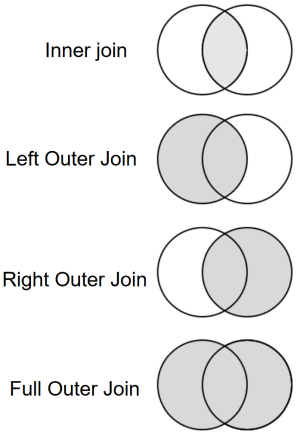

Reference URL: https://mathwords.net/wp-content/uploads/2017/06/tablejoin1.png

#### Using `pd.merge()`
`pd.merge()` function is often used to merge items by specifying one of the column names as a key.

##### Inner Join
The default join method for the merge function is inner join. You may specify a key that the two datasets have in common using the `on` argument.
In our example, we see that `MAL_ID` is common between `anime_data` and `anime_synop`, so it can be used as the key for the inner join. Note that more than one `key` can be specified. In such case, the column names are passed as a list.

In [ ]:
# Data merging (inner join)
# Keys are automatically recognized
pd.merge(anime_data_extracted, anime_synop)

,MAL_ID,Name,Score,Genres,Type,Aired,Studios,Source,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,"Apr 3, 1998 to Apr 24, 1999",Sunrise,Original,"In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,"Sep 1, 2001",Bones,Original,"other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,"Apr 1, 1998 to Sep 30, 1998",Madhouse,Manga,"Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,"Jul 2, 2002 to Dec 24, 2002",Sunrise,Original,ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,"Sep 30, 2004 to Sep 29, 2005",Toei Animation,Manga,It is the dark century and the people are suff...
...,...,...,...,...,...,...,...,...,...
11086,47398,Kimetsu Gakuen: Valentine-hen,6.59,Comedy,ONA,"Feb 14, 2021",Unknown,Original,Valentine's Day special for Kimetsu no Yaiba ....
11087,47402,Heikousen,7.52,"Music, Romance",Music,"Feb 5, 2021","10Gauge, Studio DURIAN",Original,"usic video for Eve and suis' song Heikousen , ..."
11088,47614,Nu Wushen de Canzhuo Spring Festival Special,6.83,"Slice of Life, Comedy",Special,"Feb 11, 2021",Unknown,Game,No synopsis information has been added to this...
11089,47616,Yakusoku no Neverland 2nd Season: Michishirube,4.81,"Mystery, Psychological, Supernatural, Thriller...",Special,"Feb 12, 2021",CloverWorks,Manga,cap of the first season of Yakusoku no Neverla...


Only the rows which `MAL_ID` is present in both dataframes are merged, so the number of rows is less than before being merged.

In [ ]:
# Data merging (inner join)
# Keys to merge can be specified explicitly using "on"
pd.merge(anime_data_extracted, anime_synop, on='MAL_ID')

,MAL_ID,Name_x,Score_x,Genres_x,Type,Aired,Studios,Source,Name_y,Score_y,Genres_y,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,"Apr 3, 1998 to Apr 24, 1999",Sunrise,Original,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,"Sep 1, 2001",Bones,Original,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,"Apr 1, 1998 to Sep 30, 1998",Madhouse,Manga,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,"Jul 2, 2002 to Dec 24, 2002",Sunrise,Original,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,"Sep 30, 2004 to Sep 29, 2005",Toei Animation,Manga,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...
...,...,...,...,...,...,...,...,...,...,...,...,...
11086,47398,Kimetsu Gakuen: Valentine-hen,6.59,Comedy,ONA,"Feb 14, 2021",Unknown,Original,Kimetsu Gakuen: Valentine-hen,6.59,Comedy,Valentine's Day special for Kimetsu no Yaiba ....
11087,47402,Heikousen,7.52,"Music, Romance",Music,"Feb 5, 2021","10Gauge, Studio DURIAN",Original,Heikousen,7.52,"Music, Romance","usic video for Eve and suis' song Heikousen , ..."
11088,47614,Nu Wushen de Canzhuo Spring Festival Special,6.83,"Slice of Life, Comedy",Special,"Feb 11, 2021",Unknown,Game,Nu Wushen de Canzhuo Spring Festival Special,6.83,"Slice of Life, Comedy",No synopsis information has been added to this...
11089,47616,Yakusoku no Neverland 2nd Season: Michishirube,4.81,"Mystery, Psychological, Supernatural, Thriller...",Special,"Feb 12, 2021",CloverWorks,Manga,Yakusoku no Neverland 2nd Season: Michishirube,4.81,"Mystery, Psychological, Supernatural, Thriller...",cap of the first season of Yakusoku no Neverla...


The `left_on` and `right_on` arguments can be used to specify keys individually. In addition, the `left_index` and `right_index` arguments can be used to specify and join by `Index`.

The following example merges `anime_list` and `anime_data`, using `anime_id` and `MAL_ID` columns, respectively, as keys.

In [ ]:
pd.merge(anime_list, anime_data_extracted, left_on='anime_id', right_on='MAL_ID')

,user_id,anime_id,rating,watching_status,watched_episodes,MAL_ID,Name,Score,Genres,Type,Aired,Studios,Source
0,0,67,9,1,1,67,Basilisk: Kouga Ninpou Chou,7.58,"Action, Adventure, Historical, Supernatural, R...",TV,"Apr 13, 2005 to Sep 21, 2005",Gonzo,Manga
1,0,6702,7,1,4,6702,Fairy Tail,7.68,"Action, Adventure, Comedy, Magic, Fantasy, Sho...",TV,"Oct 12, 2009 to Mar 30, 2013","Satelight, A-1 Pictures",Manga
2,0,242,10,1,4,242,Gokusen,7.42,"Slice of Life, Comedy, Drama, School, Josei",TV,"Jan 6, 2004 to Mar 30, 2004",Madhouse,Manga
3,0,4898,0,1,1,4898,Kuroshitsuji,7.75,"Action, Mystery, Comedy, Historical, Demons, S...",TV,"Oct 3, 2008 to Mar 27, 2009",A-1 Pictures,Manga
4,0,21,10,1,0,21,One Piece,8.52,"Action, Adventure, Comedy, Super Power, Drama,...",TV,"Oct 20, 1999 to ?",Toei Animation,Manga
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,2,9588,0,6,0,9588,Kyouiku Shidou The Animation,6.31,Hentai,OVA,"Nov 19, 2010",Studio Eromatick,Visual novel
488,2,10325,0,6,0,10325,Kyuuketsuki,5.93,"Hentai, Vampire",OVA,"Mar 11, 2011 to Dec 21, 2012",Unknown,Visual novel
489,2,8111,0,6,0,8111,Last Waltz: Hakudaku Mamire no Natsu Gasshuku,6.32,Hentai,OVA,"Apr 30, 2010 to Oct 29, 2010",Unknown,Visual novel
490,2,37939,0,6,0,37939,Lilitales,6.07,Hentai,OVA,"May 18, 2018 to Jun 29, 2018",SELFISH,Game


Suffixes can be added to the keys by using the `suffixes` argument to explicitly show which dataframe the keys originally come from. This is useful when there are duplicate columns occuring due to merging.

```python
pd.merge(df1, df2, ..., suffixes=('_1', '_2'))
```

##### Left Outer Join
Left outer joins specify `left` as the `how` argument. The following example joins the data in a `Dataframe` object to the table on the left (first argument). If the data corresponding to the left side is not on the right (second argument), it will be `NaN`.

For this example, we will define a separate `df1` and `df2`.

In [ ]:
# Preparing data 1
data1 = {
    'id': ['100', '101', '102', '103', '104', '106', '108', '110', '111',' 113'],
    'city': ['Tokyo', 'Osaka', 'Kyoto', 'Hokkaido', 'Tokyo', 'Tokyo', 'Osaka', 'Kyoto', 'Hokkaido', 'Tokyo'],
    'birth_year': [1990, 1989, 1992, 1997, 1982, 1991, 1988, 1990, 1995, 1981],
    'name': ['Hiroshi', 'Akiko', 'Yuki', 'Satoru', 'Steeve', 'Mituru', 'Aoi', 'Tarou', 'Suguru','Mitsuo']
}
df1 = DataFrame(data1)
df1

,id,city,birth_year,name
0,100,Tokyo,1990,Hiroshi
1,101,Osaka,1989,Akiko
2,102,Kyoto,1992,Yuki
3,103,Hokkaido,1997,Satoru
4,104,Tokyo,1982,Steeve
5,106,Tokyo,1991,Mituru
6,108,Osaka,1988,Aoi
7,110,Kyoto,1990,Tarou
8,111,Hokkaido,1995,Suguru
9,113,Tokyo,1981,Mitsuo


In [ ]:
# Preparing data 2
data2 = {
    'id': ['100', '101', '102', '105', '107'],
    'math': [50, 43, 33, 76, 98],
    'english': [90, 30, 20, 50, 30],
    'sex': ['M','F','F','M','M'],
    'index_num': [0, 1, 2, 3, 4]
}
df2 = DataFrame(data2)
df2

,id,math,english,sex,index_num
0,100,50,90,M,0
1,101,43,30,F,1
2,102,33,20,F,2
3,105,76,50,M,3
4,107,98,30,M,4


In [ ]:
# Data merge（left outer join）
pd.merge(df1, df2, how='left')

,id,city,birth_year,name,math,english,sex,index_num
0,100,Tokyo,1990,Hiroshi,50.0,90.0,M,0.0
1,101,Osaka,1989,Akiko,43.0,30.0,F,1.0
2,102,Kyoto,1992,Yuki,33.0,20.0,F,2.0
3,103,Hokkaido,1997,Satoru,NaN,NaN,NaN,NaN
4,104,Tokyo,1982,Steeve,NaN,NaN,NaN,NaN
5,106,Tokyo,1991,Mituru,NaN,NaN,NaN,NaN
6,108,Osaka,1988,Aoi,NaN,NaN,NaN,NaN
7,110,Kyoto,1990,Tarou,NaN,NaN,NaN,NaN
8,111,Hokkaido,1995,Suguru,NaN,NaN,NaN,NaN
9,113,Tokyo,1981,Mitsuo,NaN,NaN,NaN,NaN


##### Full Outer Join
The previous examples join with data that exists in both data. This time, we are joining by columns that exist in either data. For a full join, the `how` argument is `outer`. If there is no value to join, it will be `NaN`.

In [ ]:
# Data merge（Full outer join）
pd.merge(df1, df2, how='outer')

,id,city,birth_year,name,math,english,sex,index_num
0,113,Tokyo,1981.0,Mitsuo,NaN,NaN,NaN,NaN
1,100,Tokyo,1990.0,Hiroshi,50.0,90.0,M,0.0
2,101,Osaka,1989.0,Akiko,43.0,30.0,F,1.0
3,102,Kyoto,1992.0,Yuki,33.0,20.0,F,2.0
4,103,Hokkaido,1997.0,Satoru,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
7,106,Tokyo,1991.0,Mituru,NaN,NaN,NaN,NaN
8,107,NaN,NaN,NaN,98.0,30.0,M,4.0
9,108,Osaka,1988.0,Aoi,NaN,NaN,NaN,NaN
10,110,Kyoto,1990.0,Tarou,NaN,NaN,NaN,NaN


#### Using `DataFrame.join()`
Use `DataFrame.join()` method to specify `index` as a key. Its usage is similar to `pd.merge()`. Refer to the [documentation](https://pandas.pydata.org/docs/user_guide/merging.html) for detailed usage.

#### <Practice Question  3-3*>

Let's do an internal join between the following two data tables with the same `id` value.

In [ ]:
# Prepare data4
data4 = {
    'id': ['0', '1', '2', '3', '4', '6', '8', '11', '12', '13'],
    'city': ['Tokyo', 'Osaka', 'Kyoto', 'Hokkaido', 'Tokyo', 'Tokyo', 'Osaka', 'Kyoto', 'Hokkaido', 'Tokyo'],
    'birth_year': [1990, 1989, 1992, 1997, 1982, 1991, 1988, 1990, 1995, 1981],
    'name': ['Hiroshi', 'Akiko', 'Yuki', 'Satoru', 'Steeve', 'Mituru', 'Aoi', 'Tarou', 'Suguru', 'Mitsuo']
}
df4 = DataFrame(data4)
df4

,id,city,birth_year,name
0,0,Tokyo,1990,Hiroshi
1,1,Osaka,1989,Akiko
2,2,Kyoto,1992,Yuki
3,3,Hokkaido,1997,Satoru
4,4,Tokyo,1982,Steeve
5,6,Tokyo,1991,Mituru
6,8,Osaka,1988,Aoi
7,11,Kyoto,1990,Tarou
8,12,Hokkaido,1995,Suguru
9,13,Tokyo,1981,Mitsuo


In [ ]:
# Prepare data5
data5 = {
    'id': ['0', '1', '3', '6', '8'],
    'math' : [20, 30, 50, 70, 90],
    'english': [30, 50, 50, 70, 20],
    'sex': ['M', 'F', 'F', 'M', 'M'],
    'index_num': [0, 1, 2, 3, 4]
}
df5 = DataFrame(data5)
df5

,id,math,english,sex,index_num
0,0,20,30,M,0
1,1,30,50,F,1
2,3,50,50,F,2
3,6,70,70,M,3
4,8,90,20,M,4


In [ ]:
# write me!
pd.merge(df4, df5, on='id')


,id,city,birth_year,name,math,english,sex,index_num
0,0,Tokyo,1990,Hiroshi,20,30,M,0
1,1,Osaka,1989,Akiko,30,50,F,1
2,3,Hokkaido,1997,Satoru,50,50,F,2
3,6,Tokyo,1991,Mituru,70,70,M,3
4,8,Osaka,1988,Aoi,90,20,M,4


### 3.5.2 Concatenating Data
`pd.concat` is used to concatenate data without specifying keys.

#### Vertical join
The default is to simply connect vertically. The `pd.concat()` is often used to vertically stack data with identical columns.

In [ ]:
# Prepare Data 3
data3 = {
    'id': ['117', '118', '119', '120', '125'],
    'city': ['Chiba', 'Kanagawa', 'Tokyo', 'Fukuoka', 'Okinawa'],
    'birth_year': [1990, 1989, 1992, 1997, 1982],
    'name': ['Suguru', 'Kouichi', 'Satochi', 'Yukie', 'Akari']
}
df3 = DataFrame(data3)
df3

,id,city,birth_year,name
0,117,Chiba,1990,Suguru
1,118,Kanagawa,1989,Kouichi
2,119,Tokyo,1992,Satochi
3,120,Fukuoka,1997,Yukie
4,125,Okinawa,1982,Akari


In [ ]:
# concat vertically
pd.concat([df1, df3])

,id,city,birth_year,name
0,100,Tokyo,1990,Hiroshi
1,101,Osaka,1989,Akiko
2,102,Kyoto,1992,Yuki
3,103,Hokkaido,1997,Satoru
4,104,Tokyo,1982,Steeve
...,...,...,...,...
0,117,Chiba,1990,Suguru
1,118,Kanagawa,1989,Kouichi
2,119,Tokyo,1992,Satochi
3,120,Fukuoka,1997,Yukie


In the above, the `index` was combined as is, but by setting `ignore_index=True`, it is possible to reattach the `index` in order from the top.

In [ ]:
pd.concat([df1, df3], ignore_index=True)

,id,city,birth_year,name
0,100,Tokyo,1990,Hiroshi
1,101,Osaka,1989,Akiko
2,102,Kyoto,1992,Yuki
3,103,Hokkaido,1997,Satoru
4,104,Tokyo,1982,Steeve
...,...,...,...,...
10,117,Chiba,1990,Suguru
11,118,Kanagawa,1989,Kouichi
12,119,Tokyo,1992,Satochi
13,120,Fukuoka,1997,Yukie


When joining vertically with `pd.concat()`, the joining is done by column name. If the column names are different and there is no value to join, `Nan` is entered. The `sort` argument can be set to `True` to sort the `column`, or to `False` to join without sorting.

In [ ]:
# In case of sort = True
pd.concat([df1, df2], sort=True)

,birth_year,city,english,id,index_num,math,name,sex
0,1990.0,Tokyo,NaN,100,NaN,NaN,Hiroshi,NaN
1,1989.0,Osaka,NaN,101,NaN,NaN,Akiko,NaN
2,1992.0,Kyoto,NaN,102,NaN,NaN,Yuki,NaN
3,1997.0,Hokkaido,NaN,103,NaN,NaN,Satoru,NaN
4,1982.0,Tokyo,NaN,104,NaN,NaN,Steeve,NaN
...,...,...,...,...,...,...,...,...
0,NaN,NaN,90.0,100,0.0,50.0,NaN,M
1,NaN,NaN,30.0,101,1.0,43.0,NaN,F
2,NaN,NaN,20.0,102,2.0,33.0,NaN,F
3,NaN,NaN,50.0,105,3.0,76.0,NaN,M


#### Horizontal Join
To join horizontally, specify an axis for the `axis` argument. The `axis=0` is the row and `axis=1` is the column. So here you need to specify `axis=1`. In this case, they will be tied by `index` and the `columns` will be joined as they are. If `axis=0` is specified, the columns will be joined vertically. Keep in mind that this `axis` argument is used in other situations as well.

In [ ]:
pd.concat([df1, df2], axis=1)

,id,city,birth_year,name,id,math,english,sex,index_num
0,100,Tokyo,1990,Hiroshi,100,50.0,90.0,M,0.0
1,101,Osaka,1989,Akiko,101,43.0,30.0,F,1.0
2,102,Kyoto,1992,Yuki,102,33.0,20.0,F,2.0
3,103,Hokkaido,1997,Satoru,105,76.0,50.0,M,3.0
4,104,Tokyo,1982,Steeve,107,98.0,30.0,M,4.0
5,106,Tokyo,1991,Mituru,NaN,NaN,NaN,NaN,NaN
6,108,Osaka,1988,Aoi,NaN,NaN,NaN,NaN,NaN
7,110,Kyoto,1990,Tarou,NaN,NaN,NaN,NaN,NaN
8,111,Hokkaido,1995,Suguru,NaN,NaN,NaN,NaN,NaN
9,113,Tokyo,1981,Mitsuo,NaN,NaN,NaN,NaN,NaN


#### <Practice Question 3-4>
Using the data from <Practice Question 3-3>, let's vertically join the following data for `df4`.

In [ ]:
# Preparing data
data6 = {
    'id': ['70', '80', '90', '120', '150'],
    'city': ['Chiba', 'Kanagawa', 'Tokyo', 'Fukuoka', 'Okinawa'],
    'birth_year': [1980, 1999, 1995, 1994, 1994],
    'name': ['Suguru', 'Kouichi', 'Satochi', 'Yukie', 'Akari']
}
df6 = DataFrame(data6)
df6

,id,city,birth_year,name
0,70,Chiba,1980,Suguru
1,80,Kanagawa,1999,Kouichi
2,90,Tokyo,1995,Satochi
3,120,Fukuoka,1994,Yukie
4,150,Okinawa,1994,Akari


In [ ]:
# write me!
pd.concat([df4, df6], axis=0)

,id,city,birth_year,name
0,0,Tokyo,1990,Hiroshi
1,1,Osaka,1989,Akiko
2,2,Kyoto,1992,Yuki
3,3,Hokkaido,1997,Satoru
4,4,Tokyo,1982,Steeve
...,...,...,...,...
0,70,Chiba,1980,Suguru
1,80,Kanagawa,1999,Kouichi
2,90,Tokyo,1995,Satochi
3,120,Fukuoka,1994,Yukie


## 3.6 Manipulating and Transforming Data

### 3.6.1 Deleting Data
To delete columns or rows in a `DataFrame` object, you mainly use `drop()` method.

For deleting rows: Specify the `Index` of the rows you want to delete as a list in the first argument. Set `axis` to **0**.

For deleting columns: Specify the column names you want to delete as a list in the first argument. Set `axis` to **1**.

 The following example shows how to delete some rows from `anime_data_extracted`.

In [ ]:
# Delete rows in data
# axis=0 is set by default
anime_data_extracted.drop(index=[0,2]).head()

,MAL_ID,Name,Score,Genres,Type,Aired,Studios,Source
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,"Sep 1, 2001",Bones,Original
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,"Jul 2, 2002 to Dec 24, 2002",Sunrise,Original
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,"Sep 30, 2004 to Sep 29, 2005",Toei Animation,Manga
5,15,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",TV,"Apr 6, 2005 to Mar 19, 2008",Gallop,Manga
6,16,Hachimitsu to Clover,8.06,"Comedy, Drama, Josei, Romance, Slice of Life",TV,"Apr 15, 2005 to Sep 27, 2005",J.C.Staff,Manga


Here, the `Index` is no longer continuous because a row has been deleted. So let's use `DataFrame.reset_index()` to reassign a new `Index`.

In [ ]:
anime_data_extracted.drop(index=[0,2]).reset_index().head()

,index,MAL_ID,Name,Score,Genres,Type,Aired,Studios,Source
0,1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,"Sep 1, 2001",Bones,Original
1,3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,"Jul 2, 2002 to Dec 24, 2002",Sunrise,Original
2,4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,"Sep 30, 2004 to Sep 29, 2005",Toei Animation,Manga
3,5,15,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",TV,"Apr 6, 2005 to Mar 19, 2008",Gallop,Manga
4,6,16,Hachimitsu to Clover,8.06,"Comedy, Drama, Josei, Romance, Slice of Life",TV,"Apr 15, 2005 to Sep 27, 2005",J.C.Staff,Manga


Above you can see that the original `Index` has become a new `column`. If you want to delete the original `Index`, set `drop=True`.

 The following example shows how to delete the `Studios` column from `anime_data_extracted`.

In [ ]:
# Delete column in data
anime_data_extracted.drop(['Studios'], axis=1).head()

,MAL_ID,Name,Score,Genres,Type,Aired,Source
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,"Apr 3, 1998 to Apr 24, 1999",Original
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,"Sep 1, 2001",Original
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,"Apr 1, 1998 to Sep 30, 1998",Manga
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,"Jul 2, 2002 to Dec 24, 2002",Original
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,"Sep 30, 2004 to Sep 29, 2005",Manga


Note that deleting a column in the above does not delete the original data column. If you want to replace them, overwrite the dataframe using `anime_data_extracted.drop(['Studios'], axis=1)`. Alternatively, you can specify the argument `inplace=True` to replace the original data.

### 3.6.2 Removing Duplicates

This step is important because duplicates may exist in the data when analyzing data, or be created when actually tabulating the data yourself. As different reasons cause duplicates, it is important to look at the data in detail.

The `duplicated()` method is used to determine duplicates. Similar to `isnull()` method (see section 3.4.3), this returns a `True` if a duplicate exists in the same column. Note that if there are duplicates, the first one will be `False` and the second one will be `True`.

Let's count the number of duplicates in the anime name.

In [ ]:
anime_data_extracted["Name"].duplicated().sum()

np.int64(1)

The `drop_duplicates()` method returns the resulting data after removing duplicates.

In [ ]:
anime_data_extracted["Name"].drop_duplicates().isnull().sum()

np.int64(0)

### 3.6.3 Mapping

**Mapping** is a function that pulls data corresponding to a common key from one (reference) table to the other.

For example, `anime_list` has a column, `watching_status`, which contains numeric codes that represent a user's anime watching status, such as 1 for "Watching", 2 for "Completed", 3 for "On-Hold", 4 for "Dropped", and 6 for "Plan to Watch". We also know that other values, 0, 5, 33, 55, are invalid statuses, so we will drop those rows.


First, prepare a dictionary that maps each code to its category name.

In [ ]:
# Reference data
status_map = {
    1: "Watching",
    2: "Completed",
    3: "On-Hold",
    4: "Dropped",
    6: "Plan to Watch"
}
status_map

{1: 'Watching', 2: 'Completed', 3: 'On-Hold', 4: 'Dropped', 6: 'Plan to Watch'}

Then we apply it to the watching_status column.

In [ ]:
# Drop invalid rows first
invalid_status = [0, 5, 33, 55]
# Use ~ to represent NOT
anime_list = anime_list[~anime_list['watching_status'].isin(invalid_status)]

anime_list["status_label"] = anime_list["watching_status"].map(status_map)
anime_list

,user_id,anime_id,rating,watching_status,watched_episodes,status_label
0,0,67,9,1,1,Watching
1,0,6702,7,1,4,Watching
2,0,242,10,1,4,Watching
3,0,4898,0,1,1,Watching
4,0,21,10,1,0,Watching
...,...,...,...,...,...,...
494,2,9588,0,6,0,Plan to Watch
495,2,10325,0,6,0,Plan to Watch
496,2,8111,0,6,0,Plan to Watch
497,2,37939,0,6,0,Plan to Watch


##### Combining an Anonymous Function and `map`

The following is an example of using an anonymous function and `map` to retrieve some data in a column. This is an easy way to transform certain column(s) without defining functions or creating for loops to process each element one by one.

Below, we transform the scores from numbers to categories of 'Low', 'Average', or 'High'.

In [ ]:
# we need to convert score to float type first
anime_data_extracted["Score"] = anime_data_extracted["Score"].astype(float)

anime_data_extracted['ScoreCategory'] = anime_data_extracted['Score'].map(
    lambda x: 'Low' if x < 5 else ('Average' if x <= 7 else 'High')
)
anime_data_extracted.head()

,MAL_ID,Name,Score,Genres,Type,Aired,Studios,Source,ScoreCategory
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,"Apr 3, 1998 to Apr 24, 1999",Sunrise,Original,High
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,"Sep 1, 2001",Bones,Original,High
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,"Apr 1, 1998 to Sep 30, 1998",Madhouse,Manga,High
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,"Jul 2, 2002 to Dec 24, 2002",Sunrise,Original,High
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,"Sep 30, 2004 to Sep 29, 2005",Toei Animation,Manga,Average


### 3.6.4 Bin Splitting
Finally, we will discuss bin splitting. This is a useful feature when you want to divide data into some discrete range for aggregation.

For example, as shown below, you can prepare a list to bin the scores per anime. Since the scores range from 0 to 10, let's create 5 bins (0 to 2, 2 to 4, ...). We use Pandas' `pd.cut()` function for bin splitting. In the `pd.cut()` function, the first argument is the data to be split and the second argument is the boundary value to be split.

In [ ]:
scores = [0, 2, 4, 6, 8, 10]

anime_data_cut_by_score = pd.cut(anime_data_extracted["Score"], scores)
anime_data_cut_by_score

,Score
0,"(8, 10]"
1,"(8, 10]"
2,"(8, 10]"
3,"(6, 8]"
4,"(6, 8]"
...,...
17504,"(6, 8]"
17505,"(6, 8]"
17512,"(6, 8]"
17513,"(4, 6]"


The "(8, 10]" means that it **does not** include 8 but **does** include 10. In other words, the specified criterion is used as the delimiter "more than ~ and less than or equal to ~". This behavior can be changed by specifying the `left` or `right` option to the `pd.cut()` function.

If you want to use the above results to tally the number of each, use the `pd.value_counts()` function.

In [ ]:
# Aggregate results
pd.value_counts(anime_data_cut_by_score)

/tmp/ipython-input-1511542592.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(anime_data_cut_by_score)


,count
Score,
"(6, 8]",8495
"(4, 6]",3332
"(8, 10]",533
"(2, 4]",60
"(0, 2]",1


You can also name each bin by specifying the labels parameter.

In [ ]:
# rating the score using alphabets
group_names = ['D', 'C', 'B', 'A', 'A+']
anime_data_cut_by_score = pd.cut(anime_data_extracted["Score"], scores, labels=group_names)
pd.value_counts(anime_data_cut_by_score)

/tmp/ipython-input-1561197410.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(anime_data_cut_by_score)


,count
Score,
A,8495
B,3332
A+,533
C,60
D,1


Above we have passed a list for bin divisions, but specifying using an integer is also possible. In this case, the bins will be divided at equal intervals between the maximum and minimum values. Note that some data may not be divided cleanly, and some data may have decimal points.

In [ ]:
# e.g. divide into two
pd.cut(anime_data_extracted["Score"], 2)

,Score
0,"(5.52, 9.19]"
1,"(5.52, 9.19]"
2,"(5.52, 9.19]"
3,"(5.52, 9.19]"
4,"(5.52, 9.19]"
...,...
17504,"(5.52, 9.19]"
17505,"(5.52, 9.19]"
17512,"(5.52, 9.19]"
17513,"(1.843, 5.52]"


The `pd.qcut()` function can also be used to divide bins at quantile points. This creates bins of approximately the same size.

In [ ]:
pd.value_counts(pd.qcut(anime_data_extracted["Score"], 2))

/tmp/ipython-input-3198627037.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(pd.qcut(anime_data_extracted["Score"], 2))


,count
Score,
"(1.8490000000000002, 6.52]",6248
"(6.52, 9.19]",6173


One application of bin splitting is marketing analysis. For example, you can analyze each customer segment (e.g. quality customers) by dividing the customers by their total amount of purchase.

#### <Practice Question 3-8*>

Load the `student-mat.csv`, the dataset with students' attributes and math scores in secondary education of two Portuguese schools.

Column `absences` represent the number of absences. Let's count the number of people in each of the following three bins in this column. Note that the default behavior of `cut` is a closed interval on the right side. This time, specify the option `right=False` for the `cut` function to make the right side the open interval.

In [ ]:
# Load data
student_data_math = pd.read_csv('student-mat.csv', sep=';')

# Granularity of division
absences_bins = [0, 1, 5, 100]

In [ ]:
# write me!


#### <Practice Question 3-9>

With the same data as above, let's divide the “`absences`” column into three bins using the `qcut` function.

In [ ]:
# write me!

## 3.7 Aggregating Data

In this section, you will learn the process of aggregating data around a certain column.

You can use the `groupby()` method to aggregate around a particular column.

Let's group the `anime_data` by the medium of streaming, using `anime_data.groupby('Type')`. Once grouped, we can check various stats.

For example, you can calculate how many values of each `Type` by using the `size()` method, as shown below.

In [ ]:
anime_data_extracted.groupby('Type').size()

,0
Type,
Movie,2017
Music,730
ONA,1084
OVA,2999
Special,1754
TV,3837


The following is an example of calculating the average `Score` per `Type`.

In [ ]:
# calculate average score per medium of streaming
anime_data_extracted.groupby('Type')['Score'].mean()

,Score
Type,
Movie,6.497635
Music,5.882616
ONA,6.132749
OVA,6.321410
Special,6.500507
TV,6.894178


The `groupby` method is an iterator, which iteratively extracts values, and is useful for looping through the resulting elements with Python's for loops, as in the following example.

In the following example, group extracts the medium type, and subdf extracts all rows in that type only.

In [ ]:
for group, subdf in anime_data_extracted.groupby('Type'):
    print('==========================================================')
    print('Type:{0}'.format(group))
    print(subdf)

Type:Movie
       MAL_ID                                               Name  Score  \
1           5                    Cowboy Bebop: Tengoku no Tobira   8.39   
21         31           Neon Genesis Evangelion: Death & Rebirth   7.45   
22         32     Neon Genesis Evangelion: The End of Evangelion   8.51   
24         43                                   Koukaku Kidoutai   8.29   
27         46  Rurouni Kenshin: Meiji Kenkaku Romantan - Ishi...   7.56   
...       ...                                                ...    ...   
16964   42387  Hataraku Saibou!!: Saikyou no Teki, Futatabi. ...   7.18   
16966   42392  Grisaia: Phantom Trigger The Animation - Starg...   6.90   
16970   42423                  Date A Bullet: Nightmare or Queen   7.47   
17134   42836                                   This Is Not Blue   5.87   
17478   46491          Santa Company: Manatsu no Merry Christmas   5.68   

                                                  Genres   Type         Aired  \
1      

The `agg()` method is useful when you want to perform multiple calculations on data at once. The argument of the `agg()` method is a list of function names to be executed. The following is an example of calculating count, average, maximum, and minimum.

The following example uses `student-mat.csv` for the calculations.

In [ ]:
# Specify the url with data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'

# Acquire data from the url
r = requests.get(url, stream=True)

# read and extract the zipfile
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

# Load the data
student_data_math = pd.read_csv('student-mat.csv', sep=';')

# Adapt multiple functions to a column
functions = ['count', 'mean', 'max', 'min']
grouped_student_math_data1 = student_data_math.groupby(['sex', 'address'])
grouped_student_math_data1[['age','G1']].agg(functions)

age                       G1                   
            count       mean max min count       mean max min
sex address                                                  
F   R          44  16.977273  19  15    44  10.295455  19   6
    U         164  16.664634  20  15   164  10.707317  18   4
M   R          44  17.113636  21  15    44  10.659091  18   3
    U         143  16.517483  22  15   143  11.405594  19   5

#### <Practice Question 3-10*>

Let's use `student-mat.csv` to do the Pandas aggregation process.

First, let's find the average score for each `G1` on the basis of school (`school`). Columns `G1` and `school` represent the students' math grade in the first period and the students' school, respectively.

In [ ]:
# write me!

#### <Practice Question 3-11*>

Columns `G2` and `G3` represent the students' math grade in the second period and final grade, respectively. Column `address` represent where they live ('U' - urban or 'R' - rural).

Let's use “student-mat.csv” to find the average score for columns `G1`, `G2`, and `G3`, respectively, grouped by school (`school`) and address (`address`).

In [ ]:
# write me!

#### <Practice Question 3-12>

Let's use “student-mat.csv” to calculate the maximum and minimum values of `G1`, `G2`, and `G3`, respectively, based on school (`school`) and address (`address`).

In [ ]:
# write me!

## 3.8 Advanced: Hierarchical Grouping

In grouping (see section 3.7), multiple axes can be set. For example, we can examine the average `Score` per `Type` and `Source` using `anime_data`.

In [ ]:
anime_data_extracted.groupby(['Type', 'Source'])['Score'].mean()

Type   Source      
Movie  4-koma manga    7.168750
       Book            6.460000
       Card game       6.670000
       Game            6.782381
       Light novel     7.601831
                         ...   
TV     Picture book    6.132143
       Radio           6.163333
       Unknown         6.353313
       Visual novel    6.774323
       Web manga       6.860253
Name: Score, Length: 86, dtype: float64

Note that if you set the parameter `as_index = False` to the `groupby()` method, the index will not be set. This is useful when you want to treat the table as it is.

In [ ]:
anime_data_extracted.groupby(['Type', 'Source'], as_index=False)['Score'].mean()

,Type,Source,Score
0,Movie,4-koma manga,7.168750
1,Movie,Book,6.460000
2,Movie,Card game,6.670000
3,Movie,Game,6.782381
4,Movie,Light novel,7.601831
...,...,...,...
81,TV,Picture book,6.132143
82,TV,Radio,6.163333
83,TV,Unknown,6.353313
84,TV,Visual novel,6.774323


## 3.9 Advanced: Handling Missing or Anomalous Data

When handling data, there is always the presence of missing data and outlier data. In this section, you will learn how to determine and handle missing and abnormal data at a basic foundation level.

### 3.9.1 How to Handle Missing Data

First, we will discuss how to handle missing data. **Missing data** can be caused by a variety of factors, such as forgotten entries, non-response, or system problems. The main question is whether it is better to ignore, exclude, or include these plausible values. Depending on the approach, it may give results with significant bias, leading to erroneous decisions and potentially significant losses. Let's treat this issue with caution.

We will use the `anime_data` dataset. The data contains `Unknown`, which should be treated as missing values. We will first convert all missing values as NaNs (`np.nan`).



In [ ]:
anime_data = anime_data.replace('Unknown', np.nan)

We will use only some selected features in the examples below.

In [ ]:
cols_to_use2 = [
    "Name", "Score", "Type", "Premiered", "Studios", "Source",
]
anime_data_extracted2 = anime_data[cols_to_use2]
print(len(anime_data_extracted2))

17562


#### Listwise Deletion
To remove all rows with NaNs, use the `dropna()` method. This is called **listwise deletion**.

The following is the data from the previous example, where the `dropna()` method is applied to extract only rows with data in all columns. Rows with `NaN` are excluded.

In [ ]:
anime_data_extracted2.dropna()

,Name,Score,Type,Premiered,Studios,Source
0,Cowboy Bebop,8.78,TV,Spring 1998,Sunrise,Original
2,Trigun,8.24,TV,Spring 1998,Madhouse,Manga
3,Witch Hunter Robin,7.27,TV,Summer 2002,Sunrise,Original
4,Bouken Ou Beet,6.98,TV,Fall 2004,Toei Animation,Manga
5,Eyeshield 21,7.95,TV,Spring 2005,Gallop,Manga
...,...,...,...,...,...,...
17328,Jimihen!!: Jimiko wo Kaechau Jun Isei Kouyuu!!,6.12,TV,Winter 2021,Studio Hokiboshi,Manga
17365,Yami Shibai 8,6.09,TV,Winter 2021,ILCA,Original
17373,Pui Pui Molcar,8.33,TV,Winter 2021,Shin-Ei Animation,Other
17459,D4DJ Petit Mix,6.51,TV,Winter 2021,"W-Toon Studio, DMM.futureworks",Original


However, we can see that this reduces the number of rows by a large margin (17562 → 3376). It may not be the wisest choice to drop all rows when processing your data.

#### Pairwise Deletion
As you can see from the results, listwise deletion can lead to a situation where the original 10 rows of data are extremely small and the data is completely unusable. In this case, there is a way to ignore the missing column data and use only the available data. This is called **pairwise deletion**. In pairwise deletion, the `dropna` method is applied after extracting the columns you want to use.

#### Fill with `fillna`
Another method is to use `fillna()` method by passing a value to fill in the `NaN`.

For example, we can fill the missing values in `Score` with -1 using `fillna(-1)`.

In [ ]:
anime_data_extracted2["Score"] = anime_data_extracted2["Score"].fillna(-1)
anime_data_extracted2

/tmp/ipython-input-3938738411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_data_extracted2["Score"] = anime_data_extracted2["Score"].fillna(-1)


,Name,Score,Type,Premiered,Studios,Source
0,Cowboy Bebop,8.78,TV,Spring 1998,Sunrise,Original
1,Cowboy Bebop: Tengoku no Tobira,8.39,Movie,NaN,Bones,Original
2,Trigun,8.24,TV,Spring 1998,Madhouse,Manga
3,Witch Hunter Robin,7.27,TV,Summer 2002,Sunrise,Original
4,Bouken Ou Beet,6.98,TV,Fall 2004,Toei Animation,Manga
...,...,...,...,...,...,...
17557,Daomu Biji Zhi Qinling Shen Shu,-1,ONA,NaN,NaN,Novel
17558,Mieruko-chan,-1,TV,NaN,Passione,Manga
17559,Higurashi no Naku Koro ni Sotsu,-1,TV,Summer 2021,NaN,Visual novel
17560,Yama no Susume: Next Summit,-1,TV,NaN,8bit,Manga


Another method is to use the mean value to fill in the blanks. This is called  the **mean value assignment method** and uses the `mean` method. Note that when dealing with time series data, this method may include future information (missing data in the past is filled with a mean value using future data).

```python
df = pd.DataFrame(...)
df.fillna(df.mean())
```

There are many other options, so check with `?df.fillna`, etc.

#### Fill with the Previous Value
The `ffill()` method can be applied to fill with the value of the previous row.

```python
df = pd.DataFrame(...)
df.ffill()
```

This process can be used in financial time series data processing and is useful.

For missing data, here we have mechanically replaced certain values in the sample data. However, these methods are not always available. It is important to consider the data situation, background, etc., and deal with them appropriately.

#### <Practice Question 3-13>

For the following data, if there is even one column of `NaN`, delete it and display the result.

In [ ]:
# Prepare data
import numpy as np
from numpy import nan as NA
import pandas as pd


df2 = pd.DataFrame(np.random.rand(15, 6))

# Make it NA
df2.iloc[2, 0] = NA
df2.iloc[5:8, 2] = NA
df2.iloc[7:9, 3] = NA
df2.iloc[10, 5] = NA


df2

,0,1,2,3,4,5
0,0.023186,0.575676,0.861505,0.852752,0.574429,0.734875
1,0.089442,0.676828,0.547856,0.673621,0.196653,0.359322
2,NaN,0.837793,0.107126,0.552648,0.418308,0.110393
3,0.730270,0.178788,0.013785,0.073584,0.376262,0.640961
4,0.138149,0.554376,0.070540,0.317110,0.276496,0.351795
...,...,...,...,...,...,...
10,0.414969,0.516333,0.370852,0.955213,0.098548,NaN
11,0.101381,0.440663,0.207060,0.436082,0.949926,0.880130
12,0.392348,0.046430,0.605616,0.695815,0.163395,0.773330
13,0.160964,0.335238,0.923100,0.561504,0.240911,0.926239


In [ ]:
# write me!

#### <Practice Question 3-14>

Fill in the `NaN` with zeros for the data prepared in <Exercise 3-13>.

In [ ]:
# write me!

#### <Practice Question 3-15>

For the data prepared in <Practice Question 3-13>, fill in the `NaN` with the average value of each column.

In [ ]:
# write me!

### 3.9.2 How to Handle Anomaly Data

This section discusses **anomalous values (outliers)**. The question is whether to leave the outlier data as is and do nothing, remove the outlier, or replace it with a plausible value.

What exactly is an outlier? In fact, there is no unified view, and the analyst or decision maker who handles the data may make the decision. In the business world, they are used in analyzing variety of fields, such as unauthorized access patterns (in the security field), machine failures, and financial risk management (VaR), each of which is approached in a variety of ways.

Approaches to anomaly detection include simply drawing a box-and-whisker diagram to consider data above a certain percentile as an outlier, using a normal distribution, and basing the approach on the spatial proximity of the data. Other methods use machine learning (including unsupervised learning), which you will learn in subsequent chapters.

Also related to the field of anomalies is the field of extreme value statistics, which studies extreme values. Various studies have been conducted on the behavior of extreme value data, which take large values in data, and study phenomena (natural phenomena, disasters, etc.) that are rare but have a very large impact when they occur. It is applied not only in meteorology but also in the fields of finance and information communication.

This concludes our treatment of missing and outlier data. It is often said that data preprocessing is 80% of data analysis, and we often encounter missing and outlier data. In addition, there are so many different forms of data in the world that just getting them in order is a daunting task. The techniques introduced here are important, but it is also important to develop a strategy for how to deal with them.

## 3.10 Comprehensive Question

### Comprehensive Question 3-1 Data Manipulation

Using the data `student-mat.csv', which is the data showing math scores, answer the following questions.

(1) For the above data, calculate the average score of `G1` by age (`age`) x sex (`sex`) and create a table (table) such that the vertical axis is age (`age`) and the horizontal axis is sex (`sex`).

(2) For the result table displayed in (1), delete all the rows (records) that are NaN.

In [ ]:
# write me!



---



**Acknowledgements**: For use of the following three datasets
1. https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020/data
2. https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
3. https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv

**References**: Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [[http://archive.ics.uci.edu/ml](http://archive.ics.uci.edu/ml)]. Irvine, CA: University of California, School of Information and Computer Science.

- Note on citation of dataset in 1:  
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp.5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.
[http://www3.dsi.uminho.pt/pcortez/student.pdf](http://www3.dsi.uminho.pt/pcortez/student.pdf)
- Note on citation of dataset in 2:  
Liang, X., Zou, T., Guo, B., Li, S., Zhang, H., Zhang, S., Huang, H. and Chen, S. X. (2015). Assessing Beijing's PM2.5 pollution: severity, weather impact, APEC and winter heating. Proceedings of the Royal Society A, 471, 20150257.